# Hierarchical Clustering



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [9]:
#url for sample data
url='https://drive.google.com/file/d/1LoIzJFGtmMY6TKz87ZHnPDeaZi8yjf1I/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
credit_data = pd.read_csv(url)
credit_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:

def h_cluster(data, k):

    #initialising clusters
    clust= {i: [j] for i, j in zip(range(len(data)),data)}
   
    while len(clust.keys()) > k:
        #calculating centroid points
        centroid_points=[]
        for cluster in clust.keys():
            centroid_points.append(np.mean(clust[cluster], axis=0))
       #calculating distance matrix 
        distances = scipy.spatial.distance.cdist(centroid_points, centroid_points,"euclidean")
       #filling the diagnal elements of matrix with infinty
        np.fill_diagonal(distances, np.inf)
        
        i,j = np.unravel_index(np.argmin(distances), distances.shape)

        #merging closest clusters
        new_clusters = {0: clust[i] + clust[j]}
    
        for cluster_id in clust.keys():
            if (cluster_id == i) | (cluster_id == j):
                continue
            new_clusters[len(new_clusters.keys())] = clust[cluster_id]
        clust= new_clusters
    
    return clust



In [11]:
clust= h_cluster(credit_data.loc[:5000,["CreditScore", "EstimatedSalary"]].values, 5)

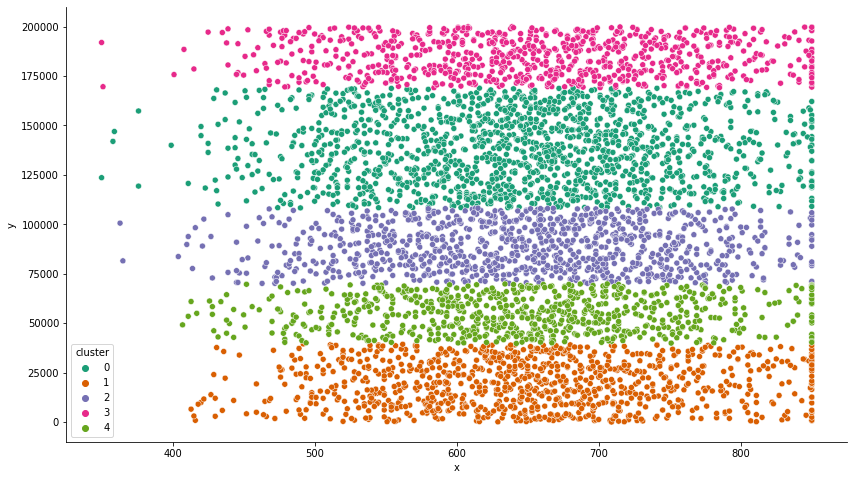

In [12]:
dfs= []

for i in clust.keys():
    df=pd.DataFrame(clust[i], columns=["x","y"])
    df["cluster"]=i
    dfs.append(df)

fig, ax = plt.subplots(figsize=(14,8))

ax=sns.scatterplot(data=pd.concat(dfs), y="y", x="x", hue="cluster", ax=ax, palette="Dark2")
sns.despine(left=False)

## Dendograms
### using scipy

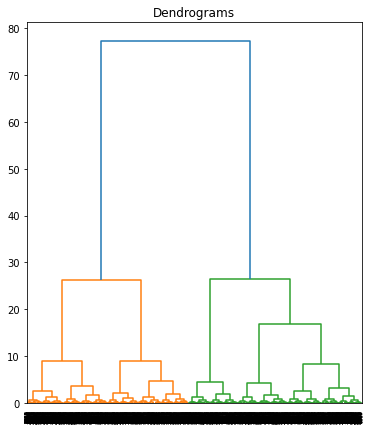

In [13]:
import scipy.cluster.hierarchy as shc

data=credit_data.loc[:5000,["CreditScore", "EstimatedSalary"]].values
#Normalizing Data
normalized_data =(data-data.mean())/data.std()

plt.figure(figsize=(6, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(normalized_data, method='ward'))